# Prepare

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup as bs

In [223]:
urls = 'https://lol.gamepedia.com/LCK/2021_Season/Spring_Season/Match_History'

# Read table data

 * Blue, Red, Winner 데이터는 비어있고, 벤픽 데이터는 NaN입니다. 이미지로 되어있기 때문에 따로 가져와서 넣어줘야 합니다.

In [224]:
dfs = pd.read_html(urls,encoding='utf-8')
dfs[4]

Tournament: LCK/2021 Season/Spring Season; Limit: 200 - Open As Query  \
                                                                     Date   
0                                           2021-03-28                      
1                                           2021-03-28                      
2                                           2021-03-28                      
3                                           2021-03-28                      
4                                           2021-03-28                      
..                                                 ...                      
195                                         2021-01-16                      
196                                         2021-01-16                      
197                                         2021-01-16                      
198                                         2021-01-16                      
199                                         2021-01-15                      

                                                     \
        P Blue Red Winner Bans Bans.1 Picks Picks.1   
0    11.5   ⁠⁠  ⁠⁠     ⁠⁠  NaN    NaN   NaN     NaN   
1    11.5   ⁠⁠  ⁠⁠     ⁠⁠  NaN    NaN   NaN     NaN   
2    11.5   ⁠⁠  ⁠⁠     ⁠⁠  NaN    NaN   NaN     NaN   
3    11.5   ⁠⁠  ⁠⁠     ⁠⁠  NaN    NaN   NaN     NaN   
4    11.5   ⁠⁠  ⁠⁠     ⁠⁠  NaN    NaN   NaN     NaN   
..    ...  ...  ..    ...  ...    ...   ...     ...   
195  11.1   ⁠⁠  ⁠⁠     ⁠⁠  NaN    NaN   NaN     NaN   
196  11.1   ⁠⁠  ⁠⁠     ⁠⁠  NaN    NaN   NaN     NaN   
197  11.1   ⁠⁠  ⁠⁠     ⁠⁠  NaN    NaN   NaN     NaN   
198  11.1   ⁠⁠  ⁠⁠     ⁠⁠  NaN    NaN   NaN     NaN   
199  11.1   ⁠⁠  ⁠⁠     ⁠⁠  NaN    NaN   NaN     NaN   

                                            \
                               Blue Roster   
0      Summit, Croco, FATE, Prince, Effort   
1        Kingen, Pyosik, SOLKA, BAO, Becca   
2      Summit, Croco, FATE, Prince, Effort   
3         Canna, Cuzz, Faker, Teddy, Keria   
4         Morgan, yoHan, Chovy, Deft, Vsta   
..                                     ...   
195      Kingen, Pyosik, SOLKA, BAO, Becca   
196        DuDu, Arthur, Chovy, Deft, Vsta   
197       Doran, Blank, Ucal, HyBriD, Zzus   
198     Summit, Croco, FATE, Route, Effort   
199  Khan, Canyon, ShowMaker, Ghost, BeryL   

                                                        
                               Red Roster  SB  MH  VOD  
0       Kingen, Pyosik, SOLKA, BAO, Becca  SB  MH  VOD  
1     Summit, Croco, FATE, Prince, Effort  SB  MH  VOD  
2       Kingen, Pyosik, SOLKA, BAO, Becca  SB  MH  VOD  
3        Morgan, yoHan, Chovy, Deft, Vsta  SB  MH  VOD  
4        Canna, Cuzz, Faker, Teddy, Keria  SB  MH  VOD  
..                                    ...  ..  ..  ...  
195       DuDu, Arthur, Chovy, Deft, Vsta  SB  MH  VOD  
196     Kingen, Pyosik, SOLKA, BAO, Becca  SB  MH  VOD  
197    Summit, Croco, FATE, Route, Effort  SB  MH  VOD  
198      Doran, Blank, Ucal, HyBriD, Zzus  SB  MH  VOD  
199  Canna, Ellim, Faker, Gumayusi, Keria  SB  MH  VOD  

[200 rows x 14 columns]

# Get empty data

## Blue, Red, Winner

In [225]:
html = requests.get(urls).text
soup = bs(html,'html.parser')

In [226]:
soup_extract  = soup.find_all('td',attrs={'class':'mhgame-result'})
soup_extract[0:5]

[<td class="mhgame-result">2021-03-28</td>,
 <td class="mhgame-result"><a class="to_hasTooltip" data-to-flags="fieM" data-to-id="Patch_11_2e-5" data-to-titles="Patch 11.5||Tooltip:Patch 11.5" href="/wiki/Patch_11.5" title="Patch 11.5">11.5</a></td>,
 <td class="mhgame-result">⁠<a class="to_hasTooltip" data-to-flags="fiem" data-to-id="Liiv_SANDBOX" data-to-titles="Liiv SANDBOX||Tooltip:Liiv SANDBOX" href="/wiki/Liiv_SANDBOX" title="Liiv SANDBOX"><img alt="Liiv SANDBOXlogo std.png" data-file-height="25" data-file-width="60" decoding="async" height="25" src="https://static.wikia.nocookie.net/lolesports_gamepedia_en/images/7/75/Liiv_SANDBOXlogo_std.png/revision/latest/scale-to-width-down/60?cb=20210319212308" width="60"/></a>⁠</td>,
 <td class="mhgame-result">⁠<a class="to_hasTooltip" data-to-flags="fiem" data-to-id="DRX" data-to-titles="DRX||Tooltip:DRX" href="/wiki/DRX" title="DRX"><img alt="DRXlogo std.png" data-file-height="25" data-file-width="60" decoding="async" height="25" src="htt

In [227]:
link_list = []
for link in soup_extract:
    for k in link.find_all('a'):
        link_list.append(k['data-to-id']) 
link_list[0:12]

['Patch_11_2e-5',
 'Liiv_SANDBOX',
 'DRX',
 'Liiv_SANDBOX',
 'Patch_11_2e-5',
 'DRX',
 'Liiv_SANDBOX',
 'DRX',
 'Patch_11_2e-5',
 'Liiv_SANDBOX',
 'DRX',
 'Liiv_SANDBOX']

In [228]:
reshape_rows = int(len(link_list)/4)
reshape_array = np.reshape(np.array(link_list),(reshape_rows,4))
blue_red_df = pd.DataFrame(reshape_array,columns=['patch','blue','red','win'])
blue_red_df

,patch,blue,red,win
0,Patch_11_2e-5,Liiv_SANDBOX,DRX,Liiv_SANDBOX
1,Patch_11_2e-5,DRX,Liiv_SANDBOX,DRX
2,Patch_11_2e-5,Liiv_SANDBOX,DRX,Liiv_SANDBOX
3,Patch_11_2e-5,T1,Hanwha_Life_Esports,T1
4,Patch_11_2e-5,Hanwha_Life_Esports,T1,T1
...,...,...,...,...
195,Patch_11_2e-1,DRX,Hanwha_Life_Esports,DRX
196,Patch_11_2e-1,Hanwha_Life_Esports,DRX,Hanwha_Life_Esports
197,Patch_11_2e-1,KT_Rolster,Liiv_SANDBOX,KT_Rolster
198,Patch_11_2e-1,Liiv_SANDBOX,KT_Rolster,KT_Rolster


## Ban, Pick

In [47]:
url2 = 'https://lol.gamepedia.com/Special:RunQuery/PickBanHistory?PBH%5Bpage%5D=LCK+2021+Spring&PBH%5Btextonly%5D=Yes&pfRunQueryFormName=PickBanHistory'
ban_pick = pd.read_html(url2,encoding='utf-8')[0]

In [121]:
ban_pick_df = pd.DataFrame(ban_pick).iloc[:,5:]
ban_pick_df.columns = ban_pick_df.columns.droplevel()
ban_pick_df.drop(['SB','MH','VOD'],axis=1,inplace=True)
ban_pick_df

,Patch,BB1,RB1,BB2,RB2,BB3,RB3,BP1,RP1-2,BP2-3,...,BR1,BR2,BR3,BR4,BR5,RR1,RR2,RR3,RR4,RR5
0,11.5,Seraphine,Gragas,Renekton,Hecarim,Tristana,Thresh,Udyr,"Lillia, Kai'Sa","Alistar, Samira",...,Jungle,Support,Bot,Mid,Top,Jungle,Bot,Top,Support,Mid
1,11.5,Thresh,Seraphine,Azir,Udyr,Gragas,Renekton,Hecarim,"Gnar, Olaf","Jayce, Zoe",...,Jungle,Top,Mid,Bot,Support,Top,Jungle,Bot,Mid,Support
2,11.5,Thresh,Camille,Renekton,Hecarim,Seraphine,Gragas,Udyr,"Lillia, Tristana","Ezreal, Gnar",...,Jungle,Bot,Top,Mid,Support,Jungle,Bot,Top,Mid,Support
3,11.5,Lucian,Seraphine,Renekton,Hecarim,Jinx,Udyr,Lillia,"Nidalee, Sion","Gnar, Viktor",...,Jungle,Top,Mid,Bot,Support,Jungle,Top,Bot,Support,Mid
4,11.5,Gnar,Lucian,Udyr,Sion,Nidalee,Renekton,Hecarim,"Seraphine, Senna","Orianna, Gragas",...,Jungle,Mid,Top,Bot,Support,Mid,Bot,Support,Jungle,Top
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,11.1,Lucian,Pantheon,Akali,Aphelios,Olaf,Yone,Taliyah,"Graves, Kai'Sa","Renekton, Samira",...,Jungle,Top,Bot,Support,Mid,Jungle,Bot,Top,Support,Mid
211,11.1,Lucian,Taliyah,Akali,Renekton,Aphelios,Pantheon,Olaf,"Graves, Zoe","Kai'Sa, Sett",...,Jungle,Bot,Top,Support,Mid,Jungle,Mid,Bot,Top,Support
212,11.1,Lucian,Pantheon,Azir,Taliyah,Akali,Nidalee,Olaf,"Kai'Sa, Graves","Aphelios, Thresh",...,Jungle,Bot,Support,Mid,Top,Bot,Jungle,Support,Mid,Top
213,11.1,Gragas,Samira,Nidalee,Taliyah,Lucian,Akali,Pantheon,"Kai'Sa, Olaf","Aphelios, Thresh",...,Jungle,Bot,Support,Mid,Top,Bot,Jungle,Support,Mid,Top


In [122]:
rep_dict = {'BB':'Blue_Ban',
            'RB':'Red_Ban',
            'BP':'Blue_Pick',
            'RP':'Red_Pick',
            'BR':'Blue_Position',
            'RR':'Red_Position'}
tmp_columns = ban_pick_df.columns

In [123]:
for k,v in rep_dict.items():
    tmp_columns = tmp_columns.str.replace(k,v)
tmp_columns

Index(['Patch', 'Blue_Ban1', 'Red_Ban1', 'Blue_Ban2', 'Red_Ban2', 'Blue_Ban3',
       'Red_Ban3', 'Blue_Pick1', 'Red_Pick1-2', 'Blue_Pick2-3', 'Red_Pick3',
       'Red_Ban4', 'Blue_Ban4', 'Red_Ban5', 'Blue_Ban5', 'Red_Pick4',
       'Blue_Pick4-5', 'Red_Pick5', 'Blue_Position1', 'Blue_Position2',
       'Blue_Position3', 'Blue_Position4', 'Blue_Position5', 'Red_Position1',
       'Red_Position2', 'Red_Position3', 'Red_Position4', 'Red_Position5'],
      dtype='object')

In [124]:
ban_pick_df.columns = tmp_columns
ban_pick_df.head()

,Patch,Blue_Ban1,Red_Ban1,Blue_Ban2,Red_Ban2,Blue_Ban3,Red_Ban3,Blue_Pick1,Red_Pick1-2,Blue_Pick2-3,...,Blue_Position1,Blue_Position2,Blue_Position3,Blue_Position4,Blue_Position5,Red_Position1,Red_Position2,Red_Position3,Red_Position4,Red_Position5
0,11.5,Seraphine,Gragas,Renekton,Hecarim,Tristana,Thresh,Udyr,"Lillia, Kai'Sa","Alistar, Samira",...,Jungle,Support,Bot,Mid,Top,Jungle,Bot,Top,Support,Mid
1,11.5,Thresh,Seraphine,Azir,Udyr,Gragas,Renekton,Hecarim,"Gnar, Olaf","Jayce, Zoe",...,Jungle,Top,Mid,Bot,Support,Top,Jungle,Bot,Mid,Support
2,11.5,Thresh,Camille,Renekton,Hecarim,Seraphine,Gragas,Udyr,"Lillia, Tristana","Ezreal, Gnar",...,Jungle,Bot,Top,Mid,Support,Jungle,Bot,Top,Mid,Support
3,11.5,Lucian,Seraphine,Renekton,Hecarim,Jinx,Udyr,Lillia,"Nidalee, Sion","Gnar, Viktor",...,Jungle,Top,Mid,Bot,Support,Jungle,Top,Bot,Support,Mid
4,11.5,Gnar,Lucian,Udyr,Sion,Nidalee,Renekton,Hecarim,"Seraphine, Senna","Orianna, Gragas",...,Jungle,Mid,Top,Bot,Support,Mid,Bot,Support,Jungle,Top


In [125]:
red12 = ban_pick_df['Red_Pick1-2'].str.split(',',expand=True)
blue23 = ban_pick_df['Blue_Pick2-3'].str.split(',',expand=True)
blue45 = ban_pick_df['Blue_Pick4-5'].str.split(',',expand=True)

In [126]:
ban_pick_df.insert(8,'Red_Pick1',red12.iloc[:,0])
ban_pick_df.insert(9,'Red_Pick2',red12.iloc[:,1])
ban_pick_df.insert(10,'Blue_Pick2',blue23.iloc[:,0])
ban_pick_df.insert(11,'Blue_Pick3',blue23.iloc[:,1])
ban_pick_df.insert(16,'Blue_Pick4',blue45.iloc[:,0])
ban_pick_df.insert(17,'Blue_Pick5',blue45.iloc[:,1])

In [127]:
ban_pick_df.drop(['Red_Pick1-2','Blue_Pick2-3','Blue_Pick4-5'],axis=1,inplace=True)

In [199]:
def select_cols(str_contain,df,with_patch=True,sel_type='contains'):
    if sel_type == 'contains':
        to_contain = df.columns.str.contains(str_contain)
    
    elif sel_type == 'start':
        to_contain = df.columns.str.startswith(str_contain)
    
    elif sel_type == 'end':
        to_contain = df.columns.str.endswith(str_contain)
    
    cols_list = df.columns[to_contain].values.tolist()
    
    if with_patch == True:
        cols_list.append('Patch')
        return cols_list
    
    else:
        return cols_list

In [200]:
position_df = ban_pick_df.loc[:,select_cols('Position',ban_pick_df)]
ban_df = ban_pick_df.loc[:,select_cols('Ban',ban_pick_df)]
pick_df = ban_pick_df.loc[:,select_cols('Pick',ban_pick_df)]

# Position

왼쪽이 블루, 오른쪽이 레드


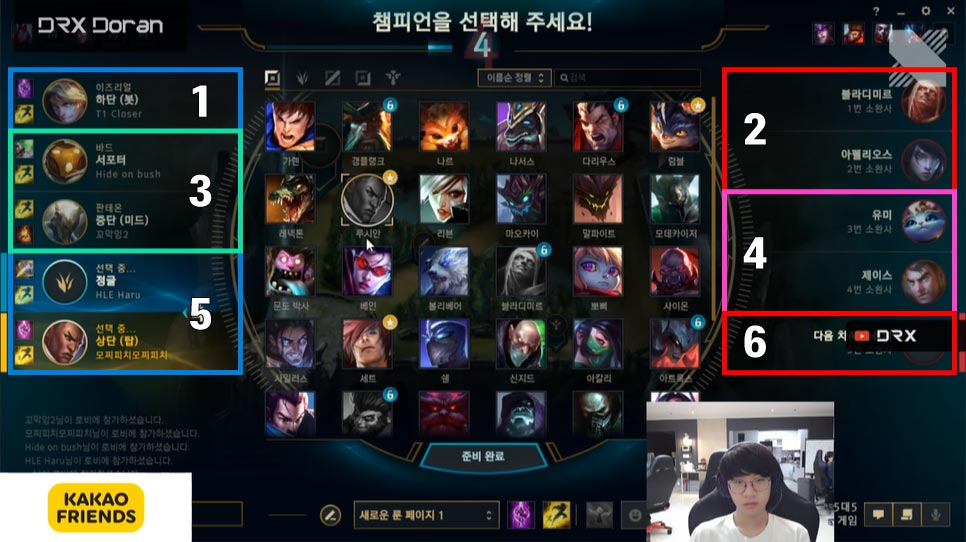

In [217]:
from IPython.display import Image
print('왼쪽이 블루, 오른쪽이 레드')
Image('https://upcle.me/wp-content/uploads/2020/06/5.jpeg')

In [201]:
blue_df = position_df[select_cols('Blue',position_df)].assign(side='Blue')
blue_df.columns = ['Position'+str(k) for k in range(1,6)] + ['Patch','side']

red_df = position_df[select_cols('Red',position_df)].assign(side='Red')
red_df.columns  = ['Position'+str(k) for k in range(1,6)] + ['Patch','side']

In [202]:
position_df2 = pd.concat([blue_df,red_df],ignore_index=True)
position_df2

,Position1,Position2,Position3,Position4,Position5,Patch,side
0,Jungle,Support,Bot,Mid,Top,11.5,Blue
1,Jungle,Top,Mid,Bot,Support,11.5,Blue
2,Jungle,Bot,Top,Mid,Support,11.5,Blue
3,Jungle,Top,Mid,Bot,Support,11.5,Blue
4,Jungle,Mid,Top,Bot,Support,11.5,Blue
...,...,...,...,...,...,...,...
425,Jungle,Bot,Top,Support,Mid,11.1,Red
426,Jungle,Mid,Bot,Top,Support,11.1,Red
427,Bot,Jungle,Support,Mid,Top,11.1,Red
428,Bot,Jungle,Support,Mid,Top,11.1,Red


C:\Users\rsh15\anaconda3\envs\simon_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Position1', ylabel='count'>

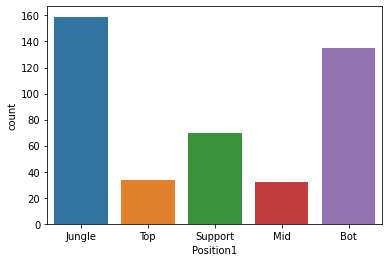

In [210]:
pos_cols = select_cols('Position',position_df2,'start')
sns.countplot(position_df2['Position1'])
# 레드블루 사이드 가리지 않고, 정글을 가장 많이 뽑았음. 그 다음은 원딜이 가장 많다. 
# 세번째는 서폿이고, 나머지 탑미드는 비슷한 빈도.

<AxesSubplot:xlabel='Position1', ylabel='count'>

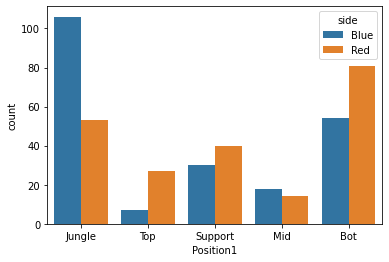

In [213]:
sns.countplot(x='Position1',hue='side',data=position_df2)
# 블루팀이 가장 먼저 픽을 함. 블루 팀에서 1픽으로 가장 많이 뽑은게 정글.

In [221]:
# 연달아서 뽑는 픽은 뭘 많이 뽑았나?
# 
for k in position_df2

[0      Support
 1          Top
 2          Bot
 3          Top
 4          Mid
         ...   
 210        Top
 211        Bot
 212        Bot
 213        Bot
 214        Top
 Name: Position2, Length: 215, dtype: object,
 0          Bot
 1          Mid
 2          Top
 3          Mid
 4          Top
         ...   
 210        Bot
 211        Top
 212    Support
 213    Support
 214        Bot
 Name: Position3, Length: 215, dtype: object]